
<a href="https://colab.research.google.com/github/pr0fez/AI23-Deep_learning/blob/main/Exercises/E1-MLP_image_classification.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Multilayered perceptron (MLP) image classification exercises 

---
These are introductory exercises in Deep learning with focus in **MLP** for image classification.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

## 0. Fashion dataset (*)

Zalando has provided an MNIST dataset for fashion, with the format very similar to the original MNIST digits dataset. Start with loading this fashion dataset from TensorFlow Keras. 

&nbsp; a) Start visualizing some of the sample images 

&nbsp; b) Normalize the images to values between 0 and 1 

&nbsp; c) Visualize same images as before, do you see any difference? 

&nbsp; d) Make histogram of a sample image before and after normalization. What do you notice? 

&nbsp; e) Check if the dataset is balanced.

<details>

<summary>Hint</summary>

</details>

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>

---

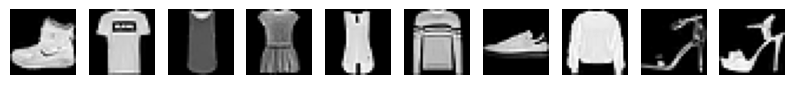

In [3]:
# a)
fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')

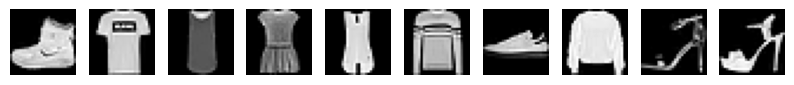

In [4]:
# b och c) ingen skillnad då normaliseringen inte har förändrat sambandet mellan värdena
fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].imshow((X_train[i]/255), cmap='gray')
    ax[i].axis('off')

<Axes: ylabel='Count'>

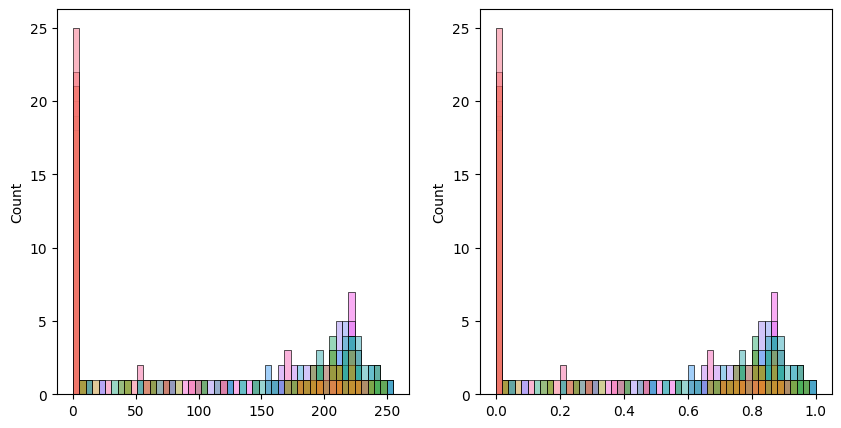

In [5]:
# d) före/efter normalisering
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(X_train[0], bins=50, ax=ax[0], legend=False)
sns.histplot(X_train[0]/255, bins=50, ax=ax[1], legend=False)

<Axes: ylabel='Count'>

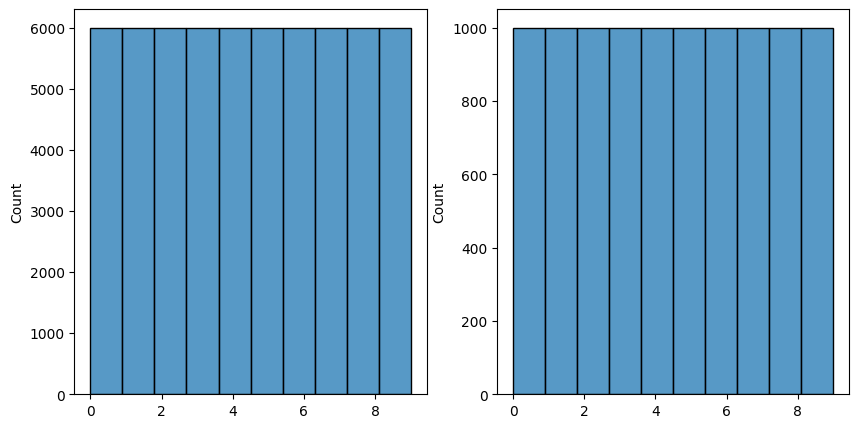

In [6]:
# e) undersök om datasettet är balanserat (ja)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(y_train, bins=10, ax=ax[0], legend=False)
sns.histplot(y_test, bins=10, ax=ax[1], legend=False)

## 1. MLP architecture (*)

As we know from the lectures, there are no certain mathematical rules for choosing number of nodes and hidden layers. What we can do is to do trial and error, but it would be expensive to not have any guidelines. Look at this [video](https://www.youtube.com/watch?v=bqBRET7tbiQ) and this [blog article ](https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af) for rule of thumbs. Note that this will be computationally expensive on your laptop for larger networks and higher resolution images. Log in to kaggle and create a jupyter notebook inside kaggle and enable GPU. Remember to shut off the GPU after you're done with your work, you get a certain amount of quotas every week. 

&nbsp; a) Create a network with no hidden layers, fit the model for 50 epochs. Use 10000 samples for validation. 

&nbsp; b) Plot training loss vs validation loss and accuracy against validation accuracy. 

&nbsp; c) Repeat a) and b) for hidden_layers $\in \{1,2,3\}$

&nbsp; d) Add dropout layers and choose a rate of dropout, and perform a few experiments. Note that you shouldn't add dropout layers after input layer and after output layer. 

&nbsp; f) Define an experiment you want to investigate and perform it.

&nbsp; g) Choose a model from your experiments. 


<details>

<summary>Hint</summary>

d) Hidden layers are used to decrease overfitting. Can you see how it impacts your loss curves?

</details>

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>

---

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.167, random_state=42)

scaled_X_train_val = scaler.fit_transform(X_train_val.reshape(-1, 28*28))
scaled_X_val = scaler.transform(X_val.reshape(-1, 28*28))
scaled_X_test = scaler.transform(X_test.reshape(-1, 28*28))

In [8]:
scaled_X_train_val.shape

(49980, 784)

In [9]:
from keras import layers, Sequential
from keras.callbacks import EarlyStopping

# a)
def model_with_num_layers(num_layers=0, num_nodes=100, X=scaled_X_train_val, y=y_train_val, X_val=scaled_X_val, y_val=y_val):
    
    input_layer = layers.InputLayer(shape=(scaled_X_train_val.shape[1], ))
    dense_layers = [layers.Dense(num_nodes, activation='relu') for _ in range(num_layers)]
    output_layer = layers.Dense(10, activation='softmax')
    
    model = Sequential([
        input_layer,
        *dense_layers,
        layers.Dropout(0.2),
        output_layer
    ])

    stopper = EarlyStopping(monitor='val_loss', mode='min', patience=5)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # display(model.summary())
    
    history = model.fit(X, y, epochs=30, validation_data=(X_val, y_val), verbose=1, callbacks=[stopper])
    
    return history

Epoch 1/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7431 - loss: 0.7284 - val_accuracy: 0.8508 - val_loss: 0.4109
Epoch 2/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8547 - loss: 0.4004 - val_accuracy: 0.8595 - val_loss: 0.3772
Epoch 3/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8691 - loss: 0.3549 - val_accuracy: 0.8729 - val_loss: 0.3440
Epoch 4/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8795 - loss: 0.3283 - val_accuracy: 0.8763 - val_loss: 0.3398
Epoch 5/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8826 - loss: 0.3153 - val_accuracy: 0.8732 - val_loss: 0.3449
Epoch 6/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8900 - loss: 0.2969 - val_accuracy: 0.8786 - val_loss: 0.3322
Epoch 7/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8927 - loss: 0.2857 - val_accuracy: 0.8840 - val_loss: 0.3220
Epoch 8/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8950 - loss: 0.2801 - 

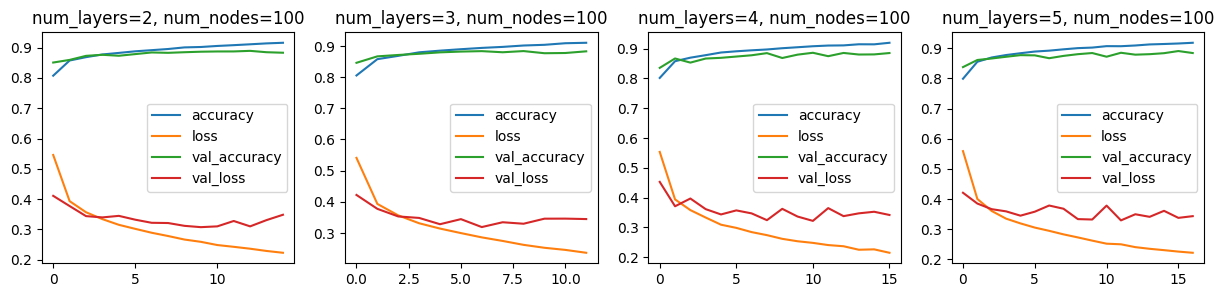

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(15, 3))

num_nodes = 100

for ax, num_layers in zip(ax, [2, 3, 4, 5]):
    pd.DataFrame(model_with_num_layers(num_layers, num_nodes=num_nodes).history).plot(ax=ax, title=f'{num_layers=}, {num_nodes=}')

## 2. Predict and evaluate (*)

Use the model you've chosen from 1. and train on all training data. Also add early stopping to further avoid overfitting. Predict on the test data and evaluate your model.

&nbsp; a) Which item was hardest to classify? Do you have any ideas of why?

&nbsp; b) Show a few samples from each category that was misclassified.

&nbsp; c) Create a folder through Python called Misclassified and save the misclassified images there. 

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>


In [11]:
scaled_X_train = scaler.fit_transform(X_train.reshape(-1, 28*28))

input_layer = layers.InputLayer(shape=(scaled_X_train_val.shape[1], ))
dense_layers = [layers.Dense(100, activation='relu') for _ in range(4)]
output_layer = layers.Dense(10, activation='softmax')

model = Sequential([
    input_layer,
    *dense_layers,
    layers.Dropout(0.2),
    output_layer
])

stopper = EarlyStopping(monitor='val_loss', mode='min', patience=5)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
display(model.summary())

history = model.fit(scaled_X_train, y_train, epochs=10, validation_data=(scaled_X_test, y_test), verbose=1, callbacks=[stopper])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,810 (428.95 KB)

 Trainable params: 109,810 (428.95 KB)

 Non-trainable params: 0 (0.00 B)

None

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7494 - loss: 0.6928 - val_accuracy: 0.8493 - val_loss: 0.4144
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8550 - loss: 0.3935 - val_accuracy: 0.8608 - val_loss: 0.3920
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8721 - loss: 0.3510 - val_accuracy: 0.8583 - val_loss: 0.3863
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8793 - loss: 0.3289 - val_accuracy: 0.8689 - val_loss: 0.3602
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8871 - loss: 0.3070 - val_accuracy: 0.8663 - val_loss: 0.3702
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8917 - loss: 0.2947 - val_accuracy: 0.8709 - val_loss: 0.3587
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8944 - loss: 0.2838 - val_accuracy: 0.8652 - val_loss: 0.3763
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8984 - loss: 0.2714 - 

In [ ]:
final_loss = pd.DataFrame(history.history)
final_loss.plot()

y_pred = model.predict(scaled_X_test)

y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step


              precision    recall  f1-score   support

 T-shirt/top       0.85      0.82      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.75      0.85      0.79      1000
       Dress       0.83      0.91      0.87      1000
        Coat       0.81      0.79      0.80      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.75      0.64      0.69      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



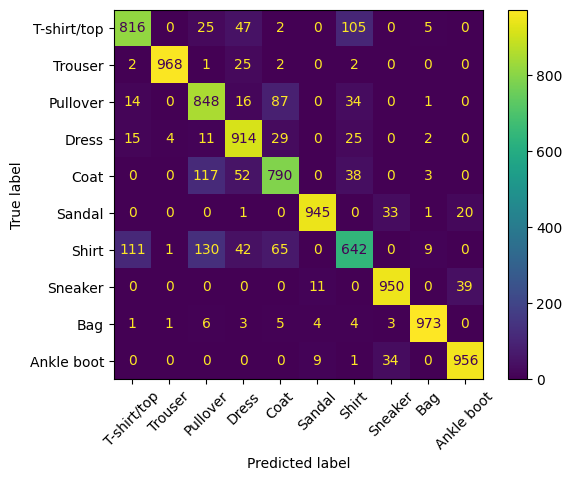

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels.values()).plot(xticks_rotation=45)
print(classification_report(y_test, y_pred, target_names=labels.values()))

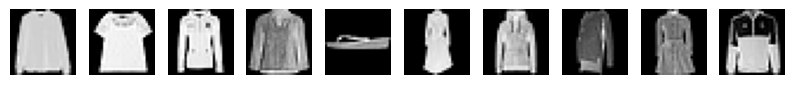

In [71]:
err_samples = X_test[y_test != y_pred]

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].imshow(err_samples[np.random.randint(0, len(err_samples))], cmap='gray')
    ax[i].axis('off')

In [73]:
import os

os.makedirs('../data/missclassified', exist_ok=True)
for i, img in enumerate(err_samples):
    plt.imsave(f'../data/missclassified/{i}.png', img, cmap='gray')

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---